Apply LDA Algorithm on Iris Dataset and classify which species a given flower belongs to. Dataset Link:https://www.kaggle.com/datasets/uciml/iris

First few rows of the Iris dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


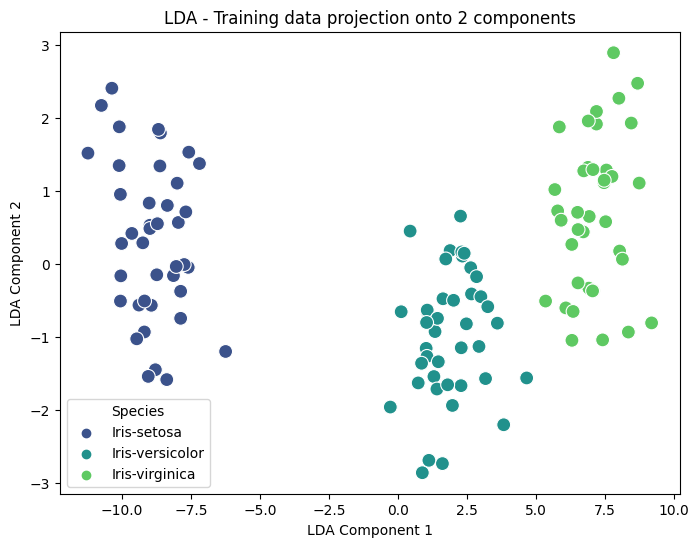

Accuracy of LDA model: 100.00%


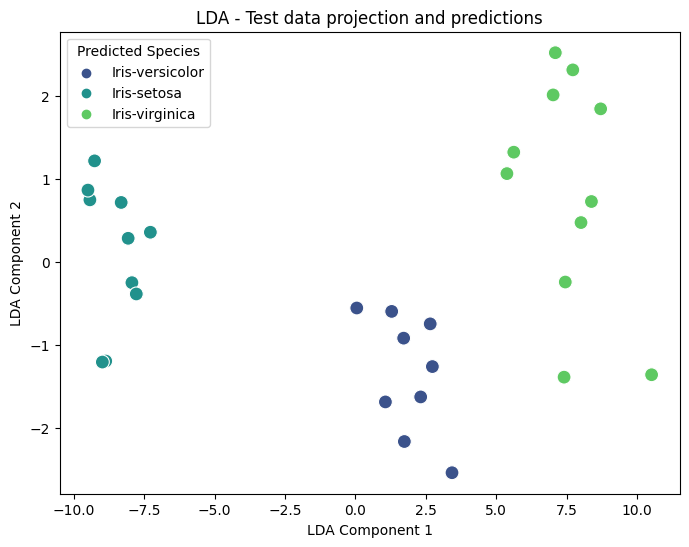

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Load the dataset from a CSV file
# Replace the path with the location where you have saved the Iris.csv file
data = pd.read_csv('Iris.csv')

# Step 3: Explore the dataset
# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(data.head())

# Step 4: Split the dataset into features (X) and target (y)
X = data.drop('Species', axis=1)  # Features (sepal length, sepal width, petal length, petal width)
# axis=1: This means that the operation will be performed along the columns
# DataFrame, returning a new DataFrame X without that column.
y = data['Species']  # Target labels (species)

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features (important for LDA)
# LDA is sensitive to the scale of the data, so it's essential to scale the features using StandardScaler(). 
# This ensures all features are on a similar scale (mean=0, standard deviation=1).

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Apply LDA
lda = LDA(n_components=2)  # Reduce to 2 components for visualization

X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Step 8: Visualize the transformed data in 2D (LDA components)
plt.figure(figsize=(8, 6))
# In X_train_lda[:, 0]:

# : means "all rows" – it selects all the rows of the array.
# 0 refers to the first column (Python uses zero-based indexing).
sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 1], hue=y_train, palette='viridis', s=100)
plt.title('LDA - Training data projection onto 2 components')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Species')
plt.show()

# Step 9: Train the LDA classifier
# LDA also performs classification, so we can directly use it for training
lda_classifier = LDA()
lda_classifier.fit(X_train_scaled, y_train)

# Step 10: Predict on the test set
y_pred = lda_classifier.predict(X_test_scaled)

# Step 11: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA model: {accuracy * 100:.2f}%')

# Step 12: Visualize the test predictions
plt.figure(figsize=(8, 6))
# hue parameter colors the points based on their predicted class labels (y_pred),
#  so that each distinct class is represented by a different color in the scatter plot.

# palette='viridis': This sets the color scheme for the points. Here, 'viridis' is a color map that goes from dark purple to yellow, 
# providing good contrast between classes.

# s=100:
# Sets the size of the scatter plot points. Larger values make points bigger; s=100 makes them reasonably large and visible.

# marker='o':
# Sets the shape of the points. Here, 'o' specifies that the points should be circular.


sns.scatterplot(x=X_test_lda[:, 0], y=X_test_lda[:, 1], hue=y_pred, palette='viridis', s=100, marker='o')
plt.title('LDA - Test data projection and predictions')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Predicted Species')
plt.show()


In [3]:
# Detailed Explanation of Each Step:
# Libraries:

# pandas: Used to load and handle the dataset.
# numpy: For numerical operations.
# sklearn: Contains the LDA model, standard scaler, and accuracy metrics.
# seaborn and matplotlib: Used to create visualizations of the data.
# Loading Dataset:

# The Iris dataset is loaded using pandas.read_csv(). The dataset is assumed to have columns such as SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and Species (which is the target variable).
# The Species column represents the different flower types (e.g., Iris-setosa, Iris-versicolor, Iris-virginica).
# Data Preprocessing:

# Split the data into X (features) and y (target labels).
# The target variable (Species) is separated, and the rest of the columns (features) are stored in X.
# Train-Test Split:

# Split the dataset into training and test sets. We use 70% of the data for training and 30% for testing. This is done using train_test_split() from sklearn.
# Standardizing Data:

# LDA is sensitive to the scale of the data, so it's essential to scale the features using StandardScaler(). This ensures all features are on a similar scale (mean=0, standard deviation=1).
# LDA:

# We apply Linear Discriminant Analysis (LDA) to reduce the dimensionality of the feature space from 4 dimensions (features) to 2 dimensions (LDA components). This is achieved using the .fit_transform() method for training data and .transform() for test data.
# Visualization:

# The LDA-transformed data (in 2D) is visualized using seaborn.scatterplot(). The training set is shown first, with each point colored according to its species.
# Training the LDA Classifier:

# LDA is also a classifier, so we directly use it to fit the model on the scaled training data (X_train_scaled) and train it on the target labels (y_train).
# Prediction:

# We use the .predict() method on the scaled test set to predict the species of the flowers in the test set.
# Model Evaluation:

# The model's accuracy is evaluated using accuracy_score() from sklearn, which compares the predicted labels (y_pred) with the actual test labels (y_test).
# Test Set Visualization:

# A scatter plot of the test set is generated, displaying the predictions in the transformed LDA space. The points are colored according to the predicted species labels.
# Key Points to Note:
# LDA vs PCA: LDA is supervised and works by finding directions that best separate the classes, whereas PCA is unsupervised and only aims to reduce dimensionality by finding the directions of maximum variance.
# Feature Scaling: It is essential to scale the features before applying LDA because it is sensitive to the magnitudes of the features.
# Interpretation: The LDA plot helps visualize how well the different species are separated in the reduced 2D space.
# Conclusion:
# By applying LDA on the Iris.csv dataset, we not only reduce the dimensionality of the dataset but also perform classification, predicting the species of flowers based on their features. This approach provides an easy-to-interpret visualization of how the species are distributed in the reduced feature space, making it easier to classify new data points.